In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np


In [2]:
x = [random.uniform(-1,1) for i in range(5000)]

In [3]:
f = lambda x: np.sin(np.pi * x)
h1 = [(f(x0) + f(x1))/2 for x0, x1 in zip(x[:len(x)//2], x[len(x)//2:])]
h2a = [(f(x0) - f(x1))/(x0-x1) for x0, x1 in  zip(x[:len(x)//2], x[len(x)//2:])]
h2b = [f(x1) - a*x1 for a, x1 in zip(h2a, x[len(x)//2:])]
xlin = np.linspace(-1,1,10000)
sin = np.sin(np.pi*xlin)

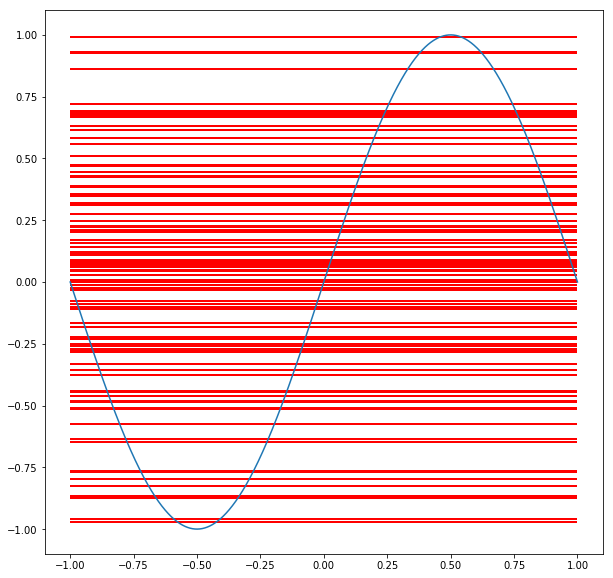

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(xlin, sin)
n = 100
for i in h1[0:n]:
    ax.hlines(y=i, xmin=-1, xmax=1, linewidth=2, color='r')

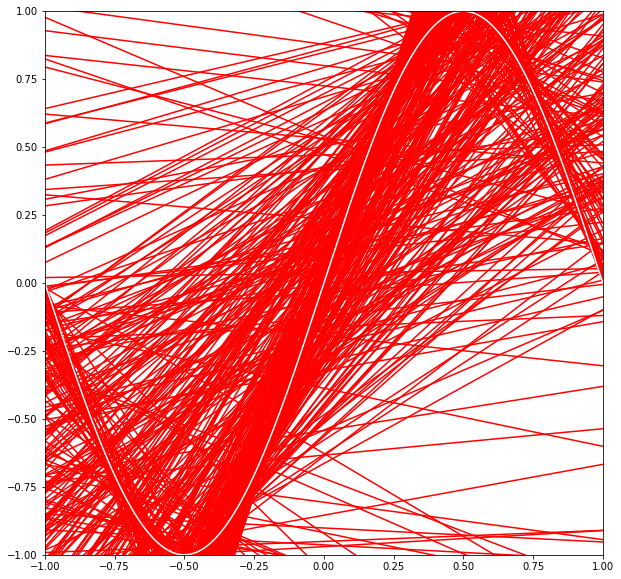

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)
n = 500
for a,b in zip(h2a[0:n],h2b[0:n]):
    f = a*xlin + b
    ax.plot(xlin, f, color = 'r')
ax.plot(xlin, sin, color = 'w')

In [6]:
hipotesis = [np.mean(h1[:i]) for i in [10,50,100,200,500,1000,2000,2500]]
todas_hipotesis = [h1[:i] for i in [10,50,100,200,500,1000,2000,2500]]

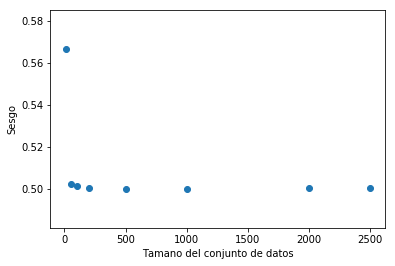

In [7]:
biasH1 = [((sin - h )**2).mean() for h in hipotesis]
plt.xlabel("Tamano del conjunto de datos")
plt.ylabel("Sesgo")
plt.scatter([10,50,100,200,500,1000,2000,2500], biasH1)

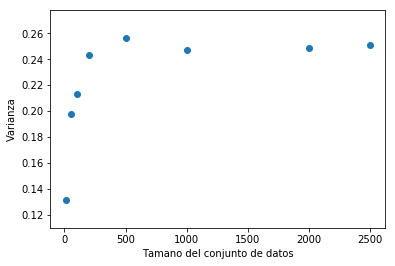

In [8]:
varianza = [np.var(hd) for hd in todas_hipotesis]
plt.xlabel("Tamano del conjunto de datos")
plt.ylabel("Varianza")
plt.scatter([10,50,100,200,500,1000,2000,2500], varianza)

In [9]:
f = lambda m, b, x: m * x + b

ha = [h2a[:i] for i in [10,50,100,200,500,1000,2000,2500]]
hb = [h2b[:i] for i in [10,50,100,200,500,1000,2000,2500]]
hipotesis_a = [np.mean(i) for i in ha]
hipotesis_b = [np.mean(i) for i in hb]

h_par = list(zip(h2a,h2b))

hx = [(ha*xlin) + hb for ha,hb in zip(hipotesis_a,hipotesis_b)]
biasH2 = [((sin - h )**2).mean() for h in hx]

var = [np.var([[a*xi+b for a,b in h_par[:n]] for xi in xlin]) for n in [10,50,100,200,500,1000,2000,2500]]

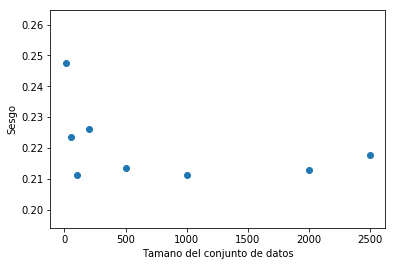

In [12]:

plt.xlabel("Tamano del conjunto de datos")
plt.ylabel("Sesgo")
plt.scatter([10,50,100,200,500,1000,2000,2500], biasH2)

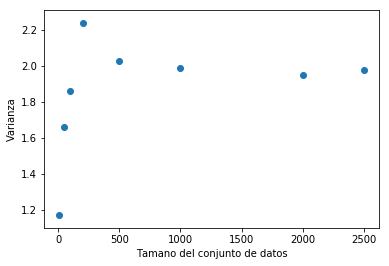

In [13]:

plt.xlabel("Tamano del conjunto de datos")
plt.ylabel("Varianza")
plt.scatter([10,50,100,200,500,1000,2000,2500], var)